# **Introduction + Data analysis and visualization**
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import pytz

# Load and Preprocess Data

In [2]:
# Load the dataset
data_path = 'EVChargingStationUsage.csv'  # Update this path if needed
data = pd.read_csv(data_path)
data

/var/folders/m7/5qwtqvds6bs3g6xjkfmmxmqr0000gn/T/ipykernel_32948/3663648821.py:3: DtypeWarning: Columns (29,30,32) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(data_path)


,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),...,Longitude,Currency,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID,County,System S/N,Model Number
0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/29/2011 20:17,PDT,7/29/2011 23:20,PDT,7/29/2011 23:20,3:03:32,1:54:03,...,-122.160309,USD,0.00,Plug Out at Vehicle,3,95124.0,3284.0,NaN,NaN,NaN
1,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 0:00,PDT,7/30/2011 0:02,PDT,7/30/2011 0:02,0:02:06,0:01:54,...,-122.160309,USD,0.00,Customer,4,94301.0,4169.0,NaN,NaN,NaN
2,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 8:16,PDT,7/30/2011 12:34,PDT,7/30/2011 12:34,4:17:32,4:17:28,...,-122.160309,USD,0.00,Plug Out at Vehicle,5,94301.0,4169.0,NaN,NaN,NaN
3,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 14:51,PDT,7/30/2011 16:55,PDT,7/30/2011 16:55,2:03:24,2:02:58,...,-122.160309,USD,0.00,Customer,6,94302.0,2545.0,NaN,NaN,NaN
4,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 18:51,PDT,7/30/2011 20:03,PDT,7/30/2011 20:03,1:11:24,0:43:54,...,-122.160309,USD,0.00,Plug Out at Vehicle,7,94043.0,3765.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259410,PALO ALTO CA / TED THOMPSON #3,0024:B100:0002:9F81,City of Palo Alto,12/31/2020 16:39,PST,12/31/2020 17:14,PST,12/31/2020 17:16,0:35:44,0:35:18,...,-122.144043,USD,0.42,Plug Out at Vehicle,2369,94301.0,2024201,NaN,1.745410e+11,CT4020-HD-GW
259411,PALO ALTO CA / WEBSTER #1,0024:B100:0002:4233,City of Palo Alto,12/31/2020 16:48,PST,12/31/2020 20:31,PST,12/31/2020 20:32,3:43:01,2:14:04,...,-122.158272,USD,4.69,Plug Out at Vehicle,7255,94541.0,242661,Santa Clara County,1.336410e+11,CT4020-HD-GW
259412,PALO ALTO CA / MPL #4,0024:B100:0003:CD37,City of Palo Alto,12/31/2020 17:28,PST,1/1/2021 10:56,PST,1/1/2021 10:57,17:28:14,5:08:12,...,-122.113510,USD,6.82,Plug Out at Vehicle,455,94306.0,449995,Santa Clara County,2.002410e+11,CT4010-HD-GW
259413,PALO ALTO CA / WEBSTER #1,0024:B100:0002:4233,City of Palo Alto,12/31/2020 17:49,PST,12/31/2020 21:55,PST,12/31/2020 21:56,4:05:34,3:53:42,...,-122.158272,USD,2.75,Plug Out at Vehicle,7256,94552.0,804075,Santa Clara County,1.336410e+11,CT4020-HD-GW


# Missing values

In [3]:
#Making a function to check for missing values, that can be called later on
def check_missing_values(df):
    missing_cols = df.isnull().sum()
    print("Missing values per column:\n", missing_cols[missing_cols > 0])

    missing_rows = df.isnull().sum(axis=1)
    total_missing = df.isnull().sum().sum()

    print(f"\nTotal missing values: {total_missing}")
    print("Total number of rows with missing values:", len(missing_rows[missing_rows > 0]))
    print("Total number of columns with missing values:", len(missing_cols[missing_cols > 0]))
    return 

check_missing_values(data)

Missing values per column:
 Transaction Date (Pacific Time)      209
Port Type                              9
EVSE ID                            78948
Currency                            1788
Ended By                             248
Driver Postal Code                  8402
User ID                             7677
County                             84665
System S/N                         78948
Model Number                       78948
dtype: int64

Total missing values: 339842
Total number of rows with missing values: 89969
Total number of columns with missing values: 10


In [4]:
# Drop rows with missing values
data = data.dropna() 

In [5]:
#Making a function to check for missing values, that can be called later on
def check_missing_values(df):
    missing_cols = df.isnull().sum()
    print("Missing values per column:\n", missing_cols[missing_cols > 0])

    missing_rows = df.isnull().sum(axis=1)
    total_missing = df.isnull().sum().sum()

    print(f"\nTotal missing values: {total_missing}")
    print("Total number of rows with missing values:", len(missing_rows[missing_rows > 0]))
    print("Total number of columns with missing values:", len(missing_cols[missing_cols > 0]))
    return 

check_missing_values(data)

Missing values per column:
 Series([], dtype: int64)

Total missing values: 0
Total number of rows with missing values: 0
Total number of columns with missing values: 0


# Stations
---

## Dater preparation for stations

### Types of data (integer, strings, etc.) and unique values
Where should labels be encoded and does any columns only have one value and therefor might be excessive?

In [6]:
#Checking for types of data and showing examples of unique values
def check_unique_values(df):
    for col in df.columns:
        print(f"{col} is of type(s): {data[col].apply(type).unique()}")
        print(f"Unique values({df[col].nunique()}): {df[col].unique()}\n")

check_unique_values(data)

Station Name is of type(s): [<class 'str'>]
Unique values(45): ['PALO ALTO CA / CAMBRIDGE #1' 'PALO ALTO CA / CAMBRIDGE #2'
 'PALO ALTO CA / HAMILTON #2' 'PALO ALTO CA / HIGH #1'
 'PALO ALTO CA / HAMILTON #1' 'PALO ALTO CA / TED THOMPSON #1'
 'PALO ALTO CA / BRYANT #2' 'PALO ALTO CA / WEBSTER #2'
 'PALO ALTO CA / HIGH #4' 'PALO ALTO CA / WEBSTER #3'
 'PALO ALTO CA / MPL #6' 'PALO ALTO CA / BRYANT #3'
 'PALO ALTO CA / MPL #4' 'PALO ALTO CA / MPL #5'
 'PALO ALTO CA / BRYANT #1' 'PALO ALTO CA / RINCONADA LIB 1'
 'PALO ALTO CA / WEBSTER #1' 'PALO ALTO CA / RINCONADA LIB 3'
 'PALO ALTO CA / RINCONADA LIB 2' 'PALO ALTO CA / MPL #3'
 'PALO ALTO CA / MPL #2' 'PALO ALTO CA / MPL #1' 'PALO ALTO CA / HIGH #2'
 'PALO ALTO CA / HIGH #3' 'PALO ALTO CA / BRYANT #6'
 'PALO ALTO CA / BRYANT #4' 'PALO ALTO CA / BRYANT #5'
 'PALO ALTO CA / TED THOMPSON #4' 'PALO ALTO CA / CAMBRIDGE #5'
 'PALO ALTO CA / CAMBRIDGE #3' 'PALO ALTO CA / CAMBRIDGE #4'
 'PALO ALTO CA / BRYANT # 1' 'PALO ALTO CA / SHERMAN 7'
 'P

In [7]:
# Checking for number of unique values in each column
def unique_values(df):
    for col in df.columns:
            print(f"{col} has {df[col].nunique()} unique values")

def one_unique_value(df):
    singular = []
    for col in df.columns:
        if df[col].nunique() == 1:
            singular.append(col)
    print(f"Columns with only one unique value: {singular}")

one_unique_value(data)
unique_values(data)

Columns with only one unique value: ['Org Name', 'City', 'State/Province', 'Country']
Station Name has 45 unique values
MAC Address has 59 unique values
Org Name has 1 unique values
Start Date has 158743 unique values
Start Time Zone has 3 unique values
End Date has 158458 unique values
End Time Zone has 3 unique values
Transaction Date (Pacific Time) has 155724 unique values
Total Duration (hh:mm:ss) has 25957 unique values
Charging Time (hh:mm:ss) has 20695 unique values
Energy (kWh) has 38314 unique values
GHG Savings (kg) has 14204 unique values
Gasoline Savings (gallons) has 5793 unique values
Port Type has 2 unique values
Port Number has 2 unique values
Plug Type has 2 unique values
EVSE ID has 49 unique values
Address 1 has 17 unique values
City has 1 unique values
State/Province has 1 unique values
Postal Code has 3 unique values
Country has 1 unique values
Latitude has 52 unique values
Longitude has 52 unique values
Currency has 3 unique values
Fee has 1723 unique values
Ended

### Converting dates to datetime

In [8]:
#Converting to datetime
data['Start Date'] = pd.to_datetime(data['Start Date'])  #Complete date and time
data['End Date'] = pd.to_datetime(data['End Date'], errors='coerce')  #Complete date and time
data['Transaction Date (Pacific Time)'] = pd.to_datetime(data['Transaction Date (Pacific Time)'], errors='coerce') #Complete date and time
data['Total Duration (hh:mm:ss)'] = pd.to_datetime(data['Total Duration (hh:mm:ss)'], format='%H:%M:%S', errors = 'coerce').dt.time #Only time
data['Charging Time (hh:mm:ss)'] = pd.to_datetime(data['Charging Time (hh:mm:ss)'], format='%H:%M:%S').dt.time #Only time
data.head()

/var/folders/m7/5qwtqvds6bs3g6xjkfmmxmqr0000gn/T/ipykernel_32948/1927231984.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Start Date'] = pd.to_datetime(data['Start Date'])  #Complete date and time
/var/folders/m7/5qwtqvds6bs3g6xjkfmmxmqr0000gn/T/ipykernel_32948/1927231984.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['End Date'] = pd.to_datetime(data['End Date'], errors='coerce')  #Complete date and time
/var/folders/m7/5qwtqvds6bs3g6xjkfmmxmqr0000gn/T/ipykernel_32948/1927231984.py:4:

,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),...,Longitude,Currency,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID,County,System S/N,Model Number
78948,PALO ALTO CA / CAMBRIDGE #1,0024:B100:0002:1329,City of Palo Alto,2016-08-01 05:21:00,PDT,2016-08-01 06:49:00,PDT,2016-08-01 06:49:00,01:27:58,01:25:26,...,-122.146065,USD,0.0,Plug Out at Vehicle,1665,94587.0,523487,Santa Clara County,1.427410e+11,CT4020-HD-GW
78949,PALO ALTO CA / CAMBRIDGE #2,0024:B100:0002:13B7,City of Palo Alto,2016-08-01 06:01:00,PDT,2016-08-01 10:58:00,PDT,2016-08-01 10:58:00,04:56:27,02:31:04,...,-122.146065,USD,0.0,Plug Out at Vehicle,1771,95030.0,141845,Santa Clara County,1.428410e+11,CT4020-HD-GW
78950,PALO ALTO CA / CAMBRIDGE #1,0024:B100:0002:1329,City of Palo Alto,2016-08-01 06:03:00,PDT,2016-08-01 09:15:00,PDT,2016-08-01 09:15:00,03:12:17,03:11:18,...,-122.146065,USD,0.0,Plug Out at Vehicle,1666,80525.0,203603,Santa Clara County,1.427410e+11,CT4020-HD-GW
78951,PALO ALTO CA / HAMILTON #2,0024:B100:0002:1331,City of Palo Alto,2016-08-01 06:10:00,PDT,2016-08-01 08:54:00,PDT,2016-08-01 08:54:00,02:44:25,02:25:49,...,-122.159904,USD,0.0,Plug Out at Vehicle,2093,94539.0,126575,Santa Clara County,1.427410e+11,CT4020-HD-GW
78952,PALO ALTO CA / HIGH #1,0024:B100:0002:10FE,City of Palo Alto,2016-08-01 06:13:00,PDT,2016-08-01 09:33:00,PDT,2016-08-01 09:33:00,03:19:24,03:19:15,...,-122.162849,USD,0.0,Plug Out at Vehicle,3112,94024.0,191743,Santa Clara County,1.422410e+11,CT4020-HD-GW


In [9]:
data['Energy (kWh)']

78948      4.464626
78949      7.501231
78950     10.891753
78951      6.968250
78952     17.938757
            ...    
259409     2.535000
259411    12.744000
259412    29.665000
259413    11.976000
259414     1.571000
Name: Energy (kWh), Length: 169446, dtype: float64

In [10]:
#Converting Charging Time to hours
data['Charging Time (hours)'] = data['Charging Time (hh:mm:ss)'].apply(lambda x: x.hour + x.minute/60 + x.second/3600)
data['Total Duration (hours)'] = data['Total Duration (hh:mm:ss)'].apply(lambda x: x.hour + x.minute/60 + x.second/3600)

#Converting into hourly energy use
data['Energy (kWh/h)'] = data['Energy (kWh)']/data['Charging Time (hours)']

# Variable for day of week
data['Day of week'] = data['Start Date'].dt.dayofweek

data.head()

/var/folders/m7/5qwtqvds6bs3g6xjkfmmxmqr0000gn/T/ipykernel_32948/338853501.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Charging Time (hours)'] = data['Charging Time (hh:mm:ss)'].apply(lambda x: x.hour + x.minute/60 + x.second/3600)
/var/folders/m7/5qwtqvds6bs3g6xjkfmmxmqr0000gn/T/ipykernel_32948/338853501.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Total Duration (hours)'] = data['Total Duration (hh:mm:ss)'].apply(lambda x: x.hour + x.minute/60 + x.second/3600)
/var/folders/m7/5q

,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),...,Plug In Event Id,Driver Postal Code,User ID,County,System S/N,Model Number,Charging Time (hours),Total Duration (hours),Energy (kWh/h),Day of week
78948,PALO ALTO CA / CAMBRIDGE #1,0024:B100:0002:1329,City of Palo Alto,2016-08-01 05:21:00,PDT,2016-08-01 06:49:00,PDT,2016-08-01 06:49:00,01:27:58,01:25:26,...,1665,94587.0,523487,Santa Clara County,1.427410e+11,CT4020-HD-GW,1.423889,1.466111,3.135516,0
78949,PALO ALTO CA / CAMBRIDGE #2,0024:B100:0002:13B7,City of Palo Alto,2016-08-01 06:01:00,PDT,2016-08-01 10:58:00,PDT,2016-08-01 10:58:00,04:56:27,02:31:04,...,1771,95030.0,141845,Santa Clara County,1.428410e+11,CT4020-HD-GW,2.517778,4.940833,2.979306,0
78950,PALO ALTO CA / CAMBRIDGE #1,0024:B100:0002:1329,City of Palo Alto,2016-08-01 06:03:00,PDT,2016-08-01 09:15:00,PDT,2016-08-01 09:15:00,03:12:17,03:11:18,...,1666,80525.0,203603,Santa Clara County,1.427410e+11,CT4020-HD-GW,3.188333,3.204722,3.416127,0
78951,PALO ALTO CA / HAMILTON #2,0024:B100:0002:1331,City of Palo Alto,2016-08-01 06:10:00,PDT,2016-08-01 08:54:00,PDT,2016-08-01 08:54:00,02:44:25,02:25:49,...,2093,94539.0,126575,Santa Clara County,1.427410e+11,CT4020-HD-GW,2.430278,2.740278,2.867265,0
78952,PALO ALTO CA / HIGH #1,0024:B100:0002:10FE,City of Palo Alto,2016-08-01 06:13:00,PDT,2016-08-01 09:33:00,PDT,2016-08-01 09:33:00,03:19:24,03:19:15,...,3112,94024.0,191743,Santa Clara County,1.422410e+11,CT4020-HD-GW,3.320833,3.323333,5.401884,0


In [11]:
df = data.set_index('User ID')
df

,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),...,Ended By,Plug In Event Id,Driver Postal Code,County,System S/N,Model Number,Charging Time (hours),Total Duration (hours),Energy (kWh/h),Day of week
User ID,,,,,,,,,,,,,,,,,,,,,
523487,PALO ALTO CA / CAMBRIDGE #1,0024:B100:0002:1329,City of Palo Alto,2016-08-01 05:21:00,PDT,2016-08-01 06:49:00,PDT,2016-08-01 06:49:00,01:27:58,01:25:26,...,Plug Out at Vehicle,1665,94587.0,Santa Clara County,1.427410e+11,CT4020-HD-GW,1.423889,1.466111,3.135516,0
141845,PALO ALTO CA / CAMBRIDGE #2,0024:B100:0002:13B7,City of Palo Alto,2016-08-01 06:01:00,PDT,2016-08-01 10:58:00,PDT,2016-08-01 10:58:00,04:56:27,02:31:04,...,Plug Out at Vehicle,1771,95030.0,Santa Clara County,1.428410e+11,CT4020-HD-GW,2.517778,4.940833,2.979306,0
203603,PALO ALTO CA / CAMBRIDGE #1,0024:B100:0002:1329,City of Palo Alto,2016-08-01 06:03:00,PDT,2016-08-01 09:15:00,PDT,2016-08-01 09:15:00,03:12:17,03:11:18,...,Plug Out at Vehicle,1666,80525.0,Santa Clara County,1.427410e+11,CT4020-HD-GW,3.188333,3.204722,3.416127,0
126575,PALO ALTO CA / HAMILTON #2,0024:B100:0002:1331,City of Palo Alto,2016-08-01 06:10:00,PDT,2016-08-01 08:54:00,PDT,2016-08-01 08:54:00,02:44:25,02:25:49,...,Plug Out at Vehicle,2093,94539.0,Santa Clara County,1.427410e+11,CT4020-HD-GW,2.430278,2.740278,2.867265,0
191743,PALO ALTO CA / HIGH #1,0024:B100:0002:10FE,City of Palo Alto,2016-08-01 06:13:00,PDT,2016-08-01 09:33:00,PDT,2016-08-01 09:33:00,03:19:24,03:19:15,...,Plug Out at Vehicle,3112,94024.0,Santa Clara County,1.422410e+11,CT4020-HD-GW,3.320833,3.323333,5.401884,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2652881,PALO ALTO CA / CAMBRIDGE #5,0024:B100:0002:9B7F,City of Palo Alto,2020-12-31 15:51:00,PST,2020-12-31 17:30:00,PST,2020-12-31 17:31:00,01:38:27,01:21:36,...,Plug Out at Vehicle,4672,94303.0,Santa Clara County,1.742410e+11,CT4020-HD,1.360000,1.640833,1.863971,3
242661,PALO ALTO CA / WEBSTER #1,0024:B100:0002:4233,City of Palo Alto,2020-12-31 16:48:00,PST,2020-12-31 20:31:00,PST,2020-12-31 20:32:00,03:43:01,02:14:04,...,Plug Out at Vehicle,7255,94541.0,Santa Clara County,1.336410e+11,CT4020-HD-GW,2.234444,3.716944,5.703431,3
449995,PALO ALTO CA / MPL #4,0024:B100:0003:CD37,City of Palo Alto,2020-12-31 17:28:00,PST,2021-01-01 10:56:00,PST,2021-01-01 10:57:00,17:28:14,05:08:12,...,Plug Out at Vehicle,455,94306.0,Santa Clara County,2.002410e+11,CT4010-HD-GW,5.136667,17.470556,5.775146,3


In [12]:
#Label Encoding
def label_encoding(df):
    le = LabelEncoder()
    for col in df.columns:
        # Check if column is of type 'object' and contains only strings
        if df[col].dtype == 'object' and all(isinstance(val, str) for val in df[col].dropna()):
            print(f"Encoding {col}")
            df[col] = le.fit_transform(df[col])
        else:
            pass
    return df

df = label_encoding(df)
df.head()

Encoding Station Name
Encoding MAC Address
Encoding Org Name
Encoding Start Time Zone
Encoding End Time Zone
Encoding Port Type
Encoding Plug Type
Encoding Address 1
Encoding City
Encoding State/Province
Encoding Country
Encoding Currency
Encoding Ended By
Encoding County
Encoding Model Number


,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),...,Ended By,Plug In Event Id,Driver Postal Code,County,System S/N,Model Number,Charging Time (hours),Total Duration (hours),Energy (kWh/h),Day of week
User ID,,,,,,,,,,,,,,,,,,,,,
523487,7,22,0,2016-08-01 05:21:00,0,2016-08-01 06:49:00,0,2016-08-01 06:49:00,01:27:58,01:25:26,...,8,1665,94587.0,1,1.427410e+11,6,1.423889,1.466111,3.135516,0
141845,8,24,0,2016-08-01 06:01:00,0,2016-08-01 10:58:00,0,2016-08-01 10:58:00,04:56:27,02:31:04,...,8,1771,95030.0,1,1.428410e+11,6,2.517778,4.940833,2.979306,0
203603,7,22,0,2016-08-01 06:03:00,0,2016-08-01 09:15:00,0,2016-08-01 09:15:00,03:12:17,03:11:18,...,8,1666,80525.0,1,1.427410e+11,6,3.188333,3.204722,3.416127,0
126575,13,23,0,2016-08-01 06:10:00,0,2016-08-01 08:54:00,0,2016-08-01 08:54:00,02:44:25,02:25:49,...,8,2093,94539.0,1,1.427410e+11,6,2.430278,2.740278,2.867265,0
191743,14,17,0,2016-08-01 06:13:00,0,2016-08-01 09:33:00,0,2016-08-01 09:33:00,03:19:24,03:19:15,...,8,3112,94024.0,1,1.422410e+11,6,3.320833,3.323333,5.401884,0


In [16]:
d = remove_missing_values(data)
d = label_encoding(data)

Columns with more than 8000 missing values have been removed Index([], dtype='object')
Encoding Station Name
Encoding MAC Address
Encoding Org Name
Encoding Start Time Zone
Encoding End Time Zone


/var/folders/m7/5qwtqvds6bs3g6xjkfmmxmqr0000gn/T/ipykernel_32281/3268516098.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
/var/folders/m7/5qwtqvds6bs3g6xjkfmmxmqr0000gn/T/ipykernel_32281/3268516098.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
/var/folders/m7/5qwtqvds6bs3g6xjkfmmxmqr0000gn/T/ipykernel_32281/3268516098.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

Encoding Port Type
Encoding Plug Type
Encoding Address 1
Encoding City
Encoding State/Province
Encoding Country
Encoding Currency
Encoding Ended By
Encoding County
Encoding Model Number


/var/folders/m7/5qwtqvds6bs3g6xjkfmmxmqr0000gn/T/ipykernel_32281/3268516098.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
/var/folders/m7/5qwtqvds6bs3g6xjkfmmxmqr0000gn/T/ipykernel_32281/3268516098.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
/var/folders/m7/5qwtqvds6bs3g6xjkfmmxmqr0000gn/T/ipykernel_32281/3268516098.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

## Grouping user data by charging time and energy consumption

In [ ]:
d = data.set_index('Start Date')

In [ ]:
d['date'] = d.index.date
d['hour'] = d.index.hour

hourly_energy = d.groupby(['Station Name', 'date', 'hour'])['Energy (kWh)'].sum().reset_index()

# Pivot table: Rows -> Station Name, Columns -> Hour, Values -> Energy (kWh)
user_hourly = hourly_energy.pivot_table(index='Station Name', columns='hour', values='Energy (kWh)', fill_value=0)
user_hourly

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Station Name,,,,,,,,,,,,,,,,,,,,,
0,2.155000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,42.064000,...,0.000000,0.000000,5.430000,0.000000,6.056500,0.000000,0.000000,0.000000,0.000000,0.000000
1,15.968664,22.920030,17.281937,19.273235,8.977538,8.237422,10.695799,9.067433,7.837912,7.772147,...,7.846299,7.756942,7.099480,6.844059,7.485997,6.892765,7.236293,9.083855,11.198523,12.281231
2,12.005408,12.962444,9.358428,17.164327,9.626071,8.833433,11.026872,8.814730,7.614132,8.528849,...,7.773904,7.247889,7.150788,6.778468,6.864802,6.870344,7.605781,9.012788,11.404069,14.575329
3,24.623062,14.947686,9.709064,0.000000,4.979555,5.367642,7.677478,11.166891,9.267048,10.936971,...,8.880367,7.800064,7.331116,7.764661,7.204926,7.071632,7.867320,11.480586,15.324031,10.140800
4,9.296000,19.965000,33.159000,0.000000,0.000000,6.788706,9.211122,10.468636,15.960627,14.694743,...,10.269243,9.287012,7.769357,9.102062,8.182677,8.293665,7.102169,11.575231,12.165000,6.071000
5,18.718667,0.000000,25.019500,0.000000,0.000000,6.980000,7.897179,11.588824,12.217459,12.444212,...,10.380880,8.482993,8.475506,8.453668,8.490078,9.135644,7.238906,13.340155,8.648737,13.538000
6,22.538167,15.949000,0.000000,23.027000,5.014833,6.742611,11.949845,12.557527,12.119712,11.264811,...,10.241648,8.223371,9.023653,8.317387,8.458419,6.678081,9.556213,11.604959,16.915061,19.481556
7,13.862013,16.623269,9.093633,7.183020,2.767345,4.828301,8.461780,10.464258,10.190193,8.582207,...,8.828619,7.718795,7.753066,7.266688,7.122498,7.275176,7.873886,9.370124,9.831519,13.435983
8,16.819531,2.131471,16.385500,10.406492,2.924780,4.898910,10.305468,11.064187,9.619833,7.772873,...,8.962293,7.718418,6.739262,7.238289,6.797411,7.299979,8.134108,8.447836,13.998906,10.932967


In [ ]:
user_hourly.columns = [f"{col}" for col in user_hourly.columns]
user_hourly

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Station Name,,,,,,,,,,,,,,,,,,,,,
0,2.155000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,42.064000,...,0.000000,0.000000,5.430000,0.000000,6.056500,0.000000,0.000000,0.000000,0.000000,0.000000
1,15.968664,22.920030,17.281937,19.273235,8.977538,8.237422,10.695799,9.067433,7.837912,7.772147,...,7.846299,7.756942,7.099480,6.844059,7.485997,6.892765,7.236293,9.083855,11.198523,12.281231
2,12.005408,12.962444,9.358428,17.164327,9.626071,8.833433,11.026872,8.814730,7.614132,8.528849,...,7.773904,7.247889,7.150788,6.778468,6.864802,6.870344,7.605781,9.012788,11.404069,14.575329
3,24.623062,14.947686,9.709064,0.000000,4.979555,5.367642,7.677478,11.166891,9.267048,10.936971,...,8.880367,7.800064,7.331116,7.764661,7.204926,7.071632,7.867320,11.480586,15.324031,10.140800
4,9.296000,19.965000,33.159000,0.000000,0.000000,6.788706,9.211122,10.468636,15.960627,14.694743,...,10.269243,9.287012,7.769357,9.102062,8.182677,8.293665,7.102169,11.575231,12.165000,6.071000
5,18.718667,0.000000,25.019500,0.000000,0.000000,6.980000,7.897179,11.588824,12.217459,12.444212,...,10.380880,8.482993,8.475506,8.453668,8.490078,9.135644,7.238906,13.340155,8.648737,13.538000
6,22.538167,15.949000,0.000000,23.027000,5.014833,6.742611,11.949845,12.557527,12.119712,11.264811,...,10.241648,8.223371,9.023653,8.317387,8.458419,6.678081,9.556213,11.604959,16.915061,19.481556
7,13.862013,16.623269,9.093633,7.183020,2.767345,4.828301,8.461780,10.464258,10.190193,8.582207,...,8.828619,7.718795,7.753066,7.266688,7.122498,7.275176,7.873886,9.370124,9.831519,13.435983
8,16.819531,2.131471,16.385500,10.406492,2.924780,4.898910,10.305468,11.064187,9.619833,7.772873,...,8.962293,7.718418,6.739262,7.238289,6.797411,7.299979,8.134108,8.447836,13.998906,10.932967


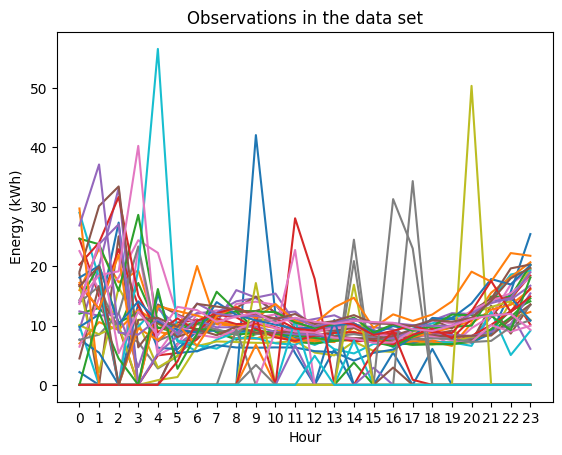

In [ ]:
plt.plot(user_hourly.T)
plt.title('Observations in the data set')
plt.xlabel('Hour')
plt.ylabel('Energy (kWh)')
plt.show()

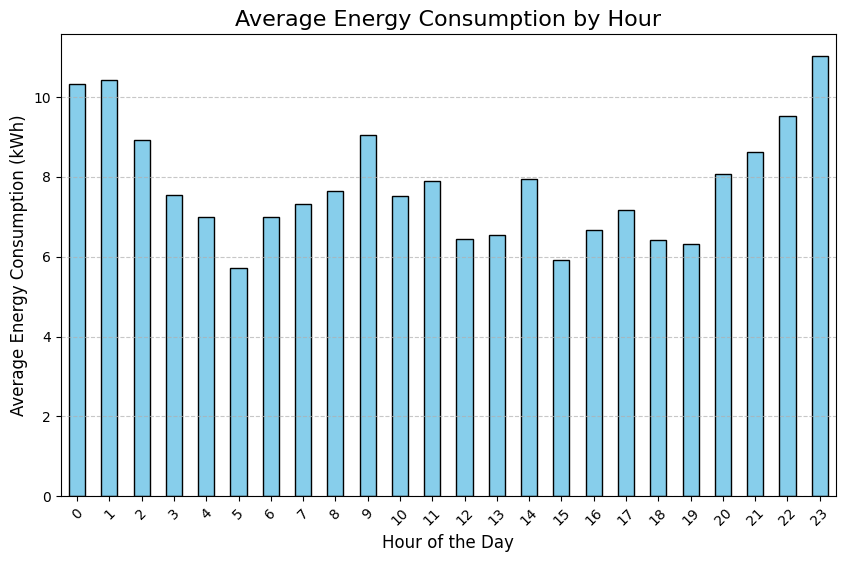

In [ ]:
# Calculate the average energy consumption per hour across all users
hourly_avg_energy = user_hourly.mean(axis=0)

# Plot the bar chart
plt.figure(figsize=(10, 6))
hourly_avg_energy.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Average Energy Consumption by Hour", fontsize=16)
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Average Energy Consumption (kWh)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


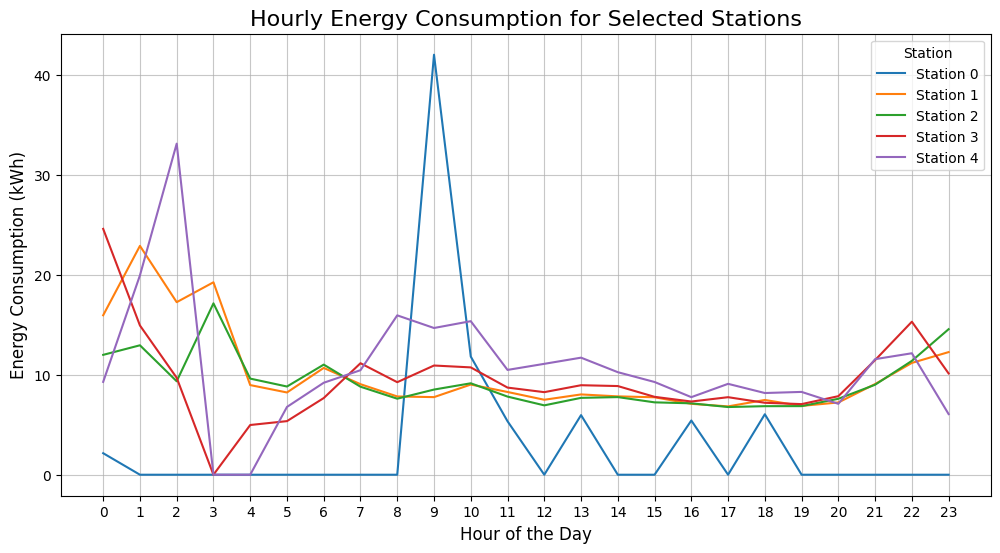

In [ ]:
# Select a subset of users (e.g., first 5 users)
subset_station = user_hourly.head(5)

# Plot energy consumption for selected users
plt.figure(figsize=(12, 6))
for station_name in subset_station.index:
    plt.plot(subset_station.columns, subset_station.loc[station_name], label=f"Station {station_name}")

plt.title("Hourly Energy Consumption for Selected Stations", fontsize=16)
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Energy Consumption (kWh)", fontsize=12)
plt.legend(title="Station")
plt.grid(alpha=0.7)
plt.show()


# Model number and port type
---

## Data preparation for Model number and port type